In [14]:
# We will create a function which takes input the training data (Input and Output Features) 
# and the Degree of Regression Polynomial 
# and Returns the Trained Model

def poly_regression(df, deg = 1, test = 0.25):
    from sklearn.model_selection import train_test_split
    X = df.iloc[:,:-1]
    Y = df.iloc[:,-1]
    (X_Train, X_Test, Y_Train, Y_Test) = train_test_split(X, Y, test_size = 0.25, random_state = 10)

    from sklearn.preprocessing import PolynomialFeatures
    poly_transformer = PolynomialFeatures(degree = deg, include_bias = False)
    
    # polynomial transformation if degree > 1       Pipeline Stage 1
    poly_transformer.fit(X_Train)
    X_Train = poly_transformer.transform(X_Train)
    X_Test = poly_transformer.transform(X_Test)

    # Standardization                               Pipeline Stage 2
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_Train)
    X_Train_Norm = scaler.transform(X_Train)
    X_Test_Norm = scaler.transform(X_Test)

    # Training                                      Pipeline Stage 3
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(n_jobs = - 1)
    model.fit(X_Train_Norm, Y_Train)

    # Predicting and Visualising
    import matplotlib.pyplot as plotter
    import numpy as np
    Y_Predicted = model.predict(X_Test_Norm)
    idx_sorted = np.array(X_Test[:, 0].argsort())

    plotter.title('Trained Model')
    plotter.xlabel('Input Feature')
    plotter.ylabel('Output Feature')
    plotter.scatter(X_Train[:, 0], Y_Train, color = 'green', label = 'Training Data', marker = '.')
    plotter.scatter(X_Test[:, 0], Y_Test, color = 'blue', label = 'Test Data', marker = '.')
    plotter.plot(np.array(X_Test[:, 0])[idx_sorted], np.array(Y_Predicted)[idx_sorted], color = 'red', label = 'predictions')
    plotter.legend()
    plotter.show()

    # Analysing Performance Metrics
    from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
    print(f'Mean Square Error : {round(mse(Y_Test, Y_Predicted),3)}')
    print(f'Mean Absolute Error : {round(mae(Y_Test, Y_Predicted),3)}')
    print(f'R² Score : {round(100*r2(Y_Test, Y_Predicted),3)}%')

    return (scaler, model)

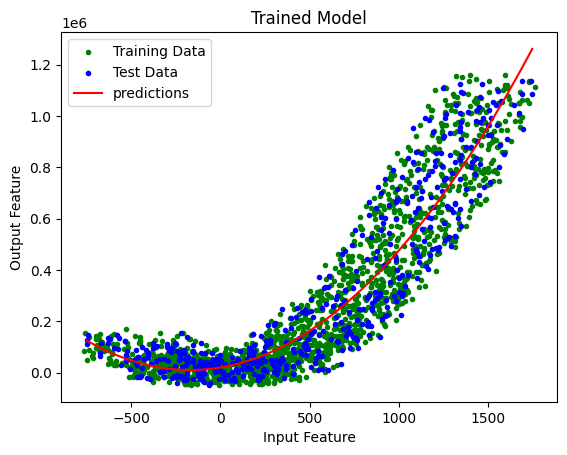

Mean Square Error : 14932947889.629
Mean Absolute Error : 92275.967
R² Score : 86.992%


In [15]:
import pandas as pd
df = pd.read_csv('./datasets/polynomial-regression.csv')
(scaler, model) = poly_regression(df, deg = 2)

# Incrementing Degree Too High will cause overfitting
# Decrementing Degree Too Low will cause underfitting

In [16]:
# using inbuilt pipelining feature from sklearn module

def poly_pipeline(dataset, deg = 1, test = 0.25):
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import PolynomialFeatures, StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split

    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree = deg)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression(n_jobs = -1))
    ])

    X = dataset.iloc[:, :-1]
    Y = dataset.iloc[:, -1]

    # splitting dataset
    (X_Train, X_Test, Y_Train, Y_Test) = train_test_split(X, Y, random_state = 10, test_size = test)
    
    # Transformation, Standardization and Training all at once
    pipe.fit(X_Train, Y_Train)

    # Predicting and Visualising
    import matplotlib.pyplot as plotter
    import numpy as np
    
    Y_Predicted = pipe.predict(X_Test)
    idx_sorted = X_Test.iloc[:, 0].values.argsort()

    plotter.title('Trained Model')
    plotter.xlabel('Input Feature')
    plotter.ylabel('Output Feature')
    plotter.scatter(X_Train.iloc[:, 0], Y_Train, color='green', label='Training Data', marker='.')
    plotter.scatter(X_Test.iloc[:, 0], Y_Test, color='blue', label='Test Data', marker='.')
    plotter.plot(
        X_Test.iloc[:, 0].values[idx_sorted],
        Y_Predicted[idx_sorted],
        color='red',
        label='predictions'
    )
    plotter.legend()
    plotter.show()

    # Analysing Performance Metrics
    from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
    print(f'Mean Square Error : {round(mse(Y_Test, Y_Predicted),3)}')
    print(f'Mean Absolute Error : {round(mae(Y_Test, Y_Predicted),3)}')
    print(f'R² Score : {round(100*r2(Y_Test, Y_Predicted),3)}%')

    return pipe

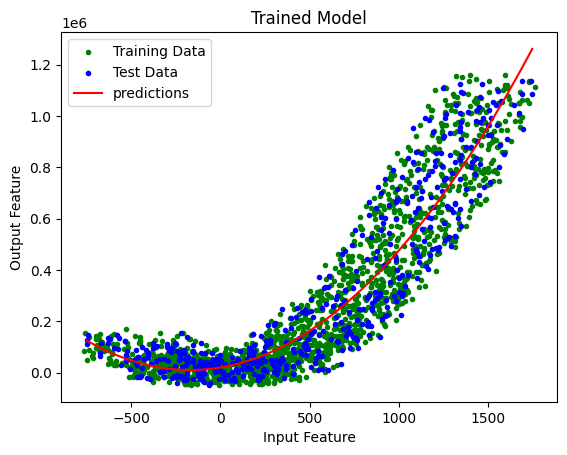

Mean Square Error : 14932947889.629
Mean Absolute Error : 92275.967
R² Score : 86.992%


,steps,"[('poly', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [17]:
import pandas as pd
df = pd.read_csv('./datasets/polynomial-regression.csv')
poly_pipeline(df, 2)